# ABOUT THE DATASET

This dataset captures procurement operations for a global enterprise, anonymized to protect company and supplier identities. It includes 700 real-world purchase orders from 2022–2023, reflecting challenges like supplier delays, compliance gaps, and defects. Ideal for analyzing supply chain efficiency, cost optimization, and vendor performance.

Key Features:

Supplier Diversity: 5 suppliers with varying reliability and compliance rates.
Real-World Complexity: Missing delivery dates, partial orders, and outliers.
Price Trends: Reflects inflationary pressures over time.
Actionable KPIs: Built-in metrics for cost savings, defect rates, and on-time delivery.
Use Cases:

Supplier Risk Analysis: Identify high-risk vendors (e.g., frequent defects or delays).
Cost Optimization: Quantify savings from price negotiations.
Compliance Audits: Investigate policy violations and their root causes.
Trend Forecasting: Analyze price changes over time.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from google.colab import files
uploaded = files.upload()


Saving Procurement KPI Analysis Dataset.csv to Procurement KPI Analysis Dataset (1).csv


In [16]:
pka = pd.read_csv('Procurement KPI Analysis Dataset.csv')

In [17]:
pka

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance
0,PO-00001,Alpha_Inc,2023-10-17,2023-10-25,Office Supplies,Cancelled,1176,20.13,17.81,NaN,Yes
1,PO-00002,Delta_Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,37.34,235.0,Yes
2,PO-00003,Gamma_Co,2022-01-26,2022-02-15,MRO,Delivered,910,95.51,92.26,41.0,Yes
3,PO-00004,Beta_Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344,99.85,95.52,112.0,Yes
4,PO-00005,Delta_Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,60.53,171.0,No
...,...,...,...,...,...,...,...,...,...,...,...
772,PO-00773,Delta_Logistics,2023-02-11,2023-02-20,Electronics,Delivered,1685,43.42,42.24,262.0,Yes
773,PO-00774,Alpha_Inc,2022-07-23,NaN,Office Supplies,Delivered,445,68.94,60.35,7.0,Yes
774,PO-00775,Gamma_Co,2022-03-19,2022-04-07,Raw Materials,Delivered,494,94.82,81.89,29.0,Yes
775,PO-00776,Beta_Supplies,2023-08-30,2023-09-11,MRO,Delivered,1306,21.05,18.27,128.0,Yes


In [18]:
# Print shapes to confirm
print("Purchase shape:", pka.shape)

Purchase shape: (777, 11)


In [19]:
pka.columns

Index(['PO_ID', 'Supplier', 'Order_Date', 'Delivery_Date', 'Item_Category',
       'Order_Status', 'Quantity', 'Unit_Price', 'Negotiated_Price',
       'Defective_Units', 'Compliance'],
      dtype='object')

In [20]:
#step Cleaning the dataset
pka.isnull().sum()

,0
PO_ID,0
Supplier,0
Order_Date,0
Delivery_Date,87
Item_Category,0
Order_Status,0
Quantity,0
Unit_Price,0
Negotiated_Price,0
Defective_Units,136


Creating a flag for cancelled orders as I didn’t drop cancelled POs. Instead, I tagged them separately so I could include them in compliance/risk KPIs but exclude them from delivery and defect metrics. This way, we don’t lose visibility on cancellations, which could also be a risk signal.”


In [21]:
pka['Is_Cancelled'] = pka['Order_Status'].eq('Cancelled')

“For delivered orders, I ensured delivery dates were valid and imputed/fixed missing ones. I treated missing defect values as zero. For pending orders, I left missing values as-is, since they are valid and indicate ongoing processes. Cancelled orders were tagged separately, excluded from defect/delivery KPIs but still tracked for compliance and risk.”

In [22]:
# Fill NaN in Defective_Units with 0 only for delivered orders
pka.loc[(pka['Order_Status'] == 'Delivered') & (pka['Defective_Units'].isna()), 'Defective_Units'] = 0

“For Partially Delivered POs, I treated missing delivery dates as valid (since the process is ongoing) but filled missing defect values with 0, assuming no defects have been reported for the partial delivery. This ensures data completeness without misrepresenting pending deliveries.”

In [23]:
# Fill missing defective units with 0 only for Delivered or Partially Delivered orders
pka.loc[(pka['Order_Status'].isin(['Delivered', 'Partially Delivered'])) & (pka['Defective_Units'].isna()), 'Defective_Units'] = 0


In [24]:
pka

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance,Is_Cancelled
0,PO-00001,Alpha_Inc,2023-10-17,2023-10-25,Office Supplies,Cancelled,1176,20.13,17.81,NaN,Yes,True
1,PO-00002,Delta_Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,37.34,235.0,Yes,False
2,PO-00003,Gamma_Co,2022-01-26,2022-02-15,MRO,Delivered,910,95.51,92.26,41.0,Yes,False
3,PO-00004,Beta_Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344,99.85,95.52,112.0,Yes,False
4,PO-00005,Delta_Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,60.53,171.0,No,False
...,...,...,...,...,...,...,...,...,...,...,...,...
772,PO-00773,Delta_Logistics,2023-02-11,2023-02-20,Electronics,Delivered,1685,43.42,42.24,262.0,Yes,False
773,PO-00774,Alpha_Inc,2022-07-23,NaN,Office Supplies,Delivered,445,68.94,60.35,7.0,Yes,False
774,PO-00775,Gamma_Co,2022-03-19,2022-04-07,Raw Materials,Delivered,494,94.82,81.89,29.0,Yes,False
775,PO-00776,Beta_Supplies,2023-08-30,2023-09-11,MRO,Delivered,1306,21.05,18.27,128.0,Yes,False


“If a PO is marked as Delivered but has no delivery date, it’s inconsistent data. If such cases are rare, I drop them. If frequent, I impute using median lead times per supplier/item, and flag those rows. This ensures the analysis remains accurate while keeping an audit trail.”  “Since many Delivered and Partially Delivered POs had missing dates, I didn’t drop them. Instead, I imputed delivery dates using historical median lead times per supplier. If supplier history was unavailable, I used the overall median. I also flagged imputed rows so the business knows which dates were estimated. This preserved data completeness while maintaining transparency.”

In [25]:
# Convert Order_Date and Delivery_Date to datetime objects
pka['Order_Date'] = pd.to_datetime(pka['Order_Date'])
pka['Delivery_Date'] = pd.to_datetime(pka['Delivery_Date'])

# Create lead time for rows with valid dates
pka['Lead_Time'] = (pka['Delivery_Date'] - pka['Order_Date']).dt.days

# Compute median lead time per supplier
median_lead_per_supplier = (
    pka[pka['Lead_Time'].notna()]
    .groupby('Supplier')['Lead_Time']
    .median()
)

# Function to impute delivery date
def impute_delivery(row):
    if pd.isna(row['Delivery_Date']) and row['Order_Status'] in ['Delivered', 'Partially Delivered']:
        # Try supplier-specific median
        if row['Supplier'] in median_lead_per_supplier:
            lead = int(median_lead_per_supplier[row['Supplier']])
        else:
            lead = int(pka['Lead_Time'].median())  # fallback to overall median
        return row['Order_Date'] + np.timedelta64(lead, 'D')
    else:
        return row['Delivery_Date']

# Apply imputation
pka['Delivery_Date'] = pka.apply(impute_delivery, axis=1)

# Add a flag to mark imputed rows
pka['Delivery_Date_Imputed'] = pka['Delivery_Date'].isna() & pka['Order_Status'].isin(['Delivered', 'Partially Delivered'])

display(pka.head()), display(pka.tail())

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance,Is_Cancelled,Lead_Time,Delivery_Date_Imputed
0,PO-00001,Alpha_Inc,2023-10-17,2023-10-25,Office Supplies,Cancelled,1176,20.13,17.81,NaN,Yes,True,8.0,False
1,PO-00002,Delta_Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,37.34,235.0,Yes,False,10.0,False
2,PO-00003,Gamma_Co,2022-01-26,2022-02-15,MRO,Delivered,910,95.51,92.26,41.0,Yes,False,20.0,False
3,PO-00004,Beta_Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344,99.85,95.52,112.0,Yes,False,19.0,False
4,PO-00005,Delta_Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,60.53,171.0,No,False,12.0,False


,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance,Is_Cancelled,Lead_Time,Delivery_Date_Imputed
772,PO-00773,Delta_Logistics,2023-02-11,2023-02-20,Electronics,Delivered,1685,43.42,42.24,262.0,Yes,False,9.0,False
773,PO-00774,Alpha_Inc,2022-07-23,2022-08-03,Office Supplies,Delivered,445,68.94,60.35,7.0,Yes,False,NaN,False
774,PO-00775,Gamma_Co,2022-03-19,2022-04-07,Raw Materials,Delivered,494,94.82,81.89,29.0,Yes,False,19.0,False
775,PO-00776,Beta_Supplies,2023-08-30,2023-09-11,MRO,Delivered,1306,21.05,18.27,128.0,Yes,False,12.0,False
776,PO-00777,Beta_Supplies,2023-12-09,2023-12-11,Office Supplies,Delivered,1988,105.20,93.23,187.0,Yes,False,2.0,False


(None, None)

Checking from which supplier the orders were mostly cancelled.

In [26]:
# Filter only cancelled orders
cancelled_orders = pka[pka['Order_Status'] == 'Cancelled']

# Count number of cancelled orders per supplier
cancelled_counts = cancelled_orders.groupby('Supplier')['PO_ID'].count().reset_index()

# Rename column for clarity
cancelled_counts.rename(columns={'PO_ID': 'Cancelled_Order_Count'}, inplace=True)

# Sort descending to find supplier with maximum cancellations
cancelled_counts = cancelled_counts.sort_values(by='Cancelled_Order_Count', ascending=False)

# View top suppliers
cancelled_counts.head(10),




(          Supplier  Cancelled_Order_Count
 2  Delta_Logistics                     16
 3    Epsilon_Group                     14
 1    Beta_Supplies                     14
 0        Alpha_Inc                     13
 4         Gamma_Co                      6,)

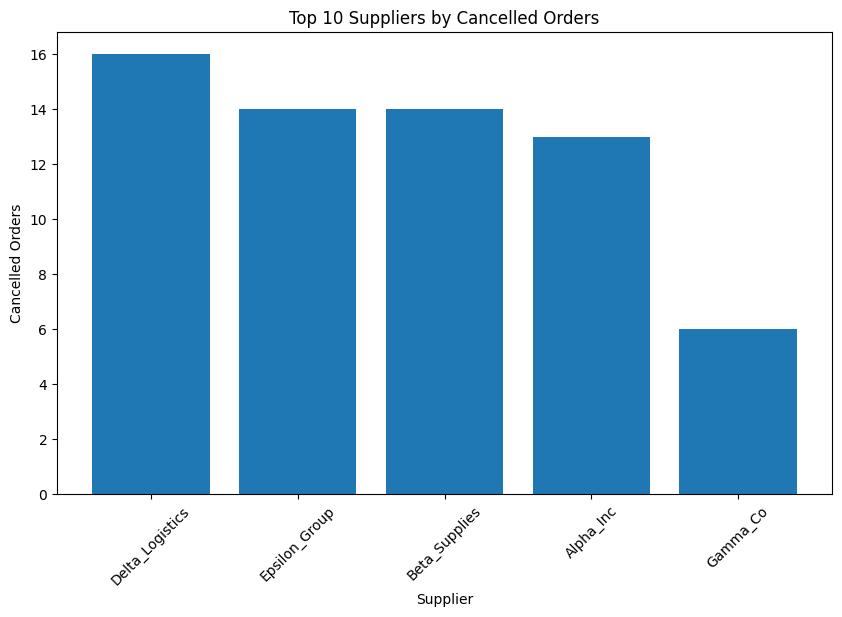

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(cancelled_counts['Supplier'].head(10), cancelled_counts['Cancelled_Order_Count'].head(10))
plt.xticks(rotation=45)
plt.xlabel('Supplier')
plt.ylabel('Cancelled Orders')
plt.title('Top 10 Suppliers by Cancelled Orders')
plt.show()


In [28]:
# Total orders per supplier
total_orders = pka.groupby('Supplier')['PO_ID'].count().reset_index()
total_orders.rename(columns={'PO_ID': 'Total_Orders'}, inplace=True)

# Cancelled orders per supplier
cancelled_orders = pka[pka['Order_Status'] == 'Cancelled'].groupby('Supplier')['PO_ID'].count().reset_index()
cancelled_orders.rename(columns={'PO_ID': 'Cancelled_Orders'}, inplace=True)

# Merge total and cancelled
supplier_stats = total_orders.merge(cancelled_orders, on='Supplier', how='left')

# Fill NaN in Cancelled_Orders with 0 (suppliers with no cancellations)
supplier_stats['Cancelled_Orders'] = supplier_stats['Cancelled_Orders'].fillna(0)

# Calculate % cancelled
supplier_stats['Cancelled_Percent'] = (supplier_stats['Cancelled_Orders'] / supplier_stats['Total_Orders']) * 100

# Sort descending by Cancelled_Percent
supplier_stats = supplier_stats.sort_values(by='Cancelled_Percent', ascending=False)

# View top suppliers by cancelled %
supplier_stats.head(10)


,Supplier,Total_Orders,Cancelled_Orders,Cancelled_Percent
2,Delta_Logistics,171,16,9.356725
0,Alpha_Inc,141,13,9.219858
1,Beta_Supplies,156,14,8.974359
3,Epsilon_Group,166,14,8.433735
4,Gamma_Co,143,6,4.195804


To understand the best supplier with least cancelled or no cancelled orders

In [29]:
import pandas as pd

# Total orders per supplier
total_orders = pka.groupby('Supplier')['PO_ID'].count().reset_index(name='Total_Orders')

# Cancelled orders per supplier
cancelled_orders = pka[pka['Order_Status'] == 'Cancelled'].groupby('Supplier')['PO_ID'].count().reset_index(name='Cancelled_Orders')

# Delivered orders for lead time and defect calculations
delivered_orders = pka[pka['Order_Status'].isin(['Delivered','Partially Delivered'])].copy()
delivered_orders['Lead_Time'] = (delivered_orders['Delivery_Date'] - delivered_orders['Order_Date']).dt.days

# Average delivery time per supplier
avg_delivery = delivered_orders.groupby('Supplier')['Lead_Time'].mean().reset_index(name='Avg_Delivery_Days')

# Average defective units per supplier
avg_defects = delivered_orders.groupby('Supplier')['Defective_Units'].mean().reset_index(name='Avg_Defective_Units')

# Merge all metrics
supplier_metrics = total_orders.merge(cancelled_orders, on='Supplier', how='left') \
                               .merge(avg_delivery, on='Supplier', how='left') \
                               .merge(avg_defects, on='Supplier', how='left')

# Fill NaNs for suppliers with no cancelled orders or defects
supplier_metrics['Cancelled_Orders'] = supplier_metrics['Cancelled_Orders'].fillna(0)
supplier_metrics['Avg_Defective_Units'] = supplier_metrics['Avg_Defective_Units'].fillna(0)

# Calculate Cancelled %
supplier_metrics['Cancelled_Percent'] = (supplier_metrics['Cancelled_Orders'] / supplier_metrics['Total_Orders']) * 100
display(supplier_metrics)

,Supplier,Total_Orders,Cancelled_Orders,Avg_Delivery_Days,Avg_Defective_Units,Cancelled_Percent
0,Alpha_Inc,141,13,10.564103,19.521368,9.219858
1,Beta_Supplies,156,14,11.146341,86.284553,8.974359
2,Delta_Logistics,171,16,10.601449,114.159420,9.356725
3,Epsilon_Group,166,14,10.708955,27.947761,8.433735
4,Gamma_Co,143,6,9.983471,50.553719,4.195804


In [30]:
# List of unique supplier names
unique_suppliers = pka['Supplier'].unique()
print(unique_suppliers)

['Alpha_Inc' 'Delta_Logistics' 'Gamma_Co' 'Beta_Supplies' 'Epsilon_Group']


Understanding the KPIs

PO Compliance % (Policy Adherence)

Definition: % of purchase orders approved according to policy (e.g., approved before delivery).

Formula:
PO Compliance %=Total POsNumber of compliant POs​×100



Average Approval/Resolution Time (Efficiency)

Definition: Average time to approve or resolve a PO.

Formula:

Average Resolution Days
=
Sum of (Approval/Resolution Date - Order Date)
Total POs
Average Resolution Days=
Total POs
Sum of (Approval/Resolution Date - Order Date)
	​




  % of Red-Flag POs (Risk)

Definition: % of POs that are high risk (e.g., unapproved, delayed >5 days, high value).

Example Rule: Compliance='No' or Resolution_Days > 5 or Unit_Price > 1000.





Spend Under Management

Definition: Portion of total spend that is monitored/managed under formal procurement policy.

Formula:

Spend Under Management
=
Spend of Compliant POs
Total Spend
×
100
Spend Under Management=
Total Spend
Spend of Compliant POs
	​

×100






Supplier Performance Metrics

Common Metrics:

On-time delivery: % of deliveries completed on or before expected date.

Defect rate: Avg defective units per total units delivered.

Cost variance: Difference between negotiated vs actual price.


In [31]:
# Assuming Compliance column has 'Yes'/'No'
po_compliance_percent = (pka['Compliance'].eq('Yes').sum() / len(pka)) * 100
print("PO Compliance %:", round(po_compliance_percent,2))


PO Compliance %: 82.37


In [32]:
# Ensure Resolution_Date or Approval_Date exists; using Delivery_Date as proxy
pka['Resolution_Days'] = (pka['Delivery_Date'] - pka['Order_Date']).dt.days
avg_resolution_days = pka['Resolution_Days'].mean()
print("Average Resolution Days:", round(avg_resolution_days,2))


Average Resolution Days: 10.8


In [34]:
# Define red-flag POs
red_flags = pka[(pka['Compliance']=='No') | (pka['Resolution_Days']>5) | (pka['Unit_Price']>1000)]

# Select key columns
red_flag_table = red_flags[['PO_ID','Supplier','Item_Category','Unit_Price','Resolution_Days','Compliance']]
red_flag_table.head(10)  # show top 10

,PO_ID,Supplier,Item_Category,Unit_Price,Resolution_Days,Compliance
0,PO-00001,Alpha_Inc,Office Supplies,20.13,8.0,Yes
1,PO-00002,Delta_Logistics,Office Supplies,39.32,10.0,Yes
2,PO-00003,Gamma_Co,MRO,95.51,20.0,Yes
3,PO-00004,Beta_Supplies,Packaging,99.85,19.0,Yes
4,PO-00005,Delta_Logistics,Raw Materials,64.07,12.0,No
5,PO-00006,Epsilon_Group,MRO,69.21,12.0,Yes
6,PO-00007,Gamma_Co,MRO,51.37,11.0,No
7,PO-00008,Alpha_Inc,MRO,36.93,14.0,Yes
9,PO-00010,Gamma_Co,Raw Materials,76.87,12.0,Yes
10,PO-00011,Epsilon_Group,Raw Materials,78.49,15.0,Yes


In [36]:
# Define red-flag POs
red_flag_pos = pka[(pka['Compliance']=='No') | (pka['Resolution_Days']>5) | (pka['Unit_Price']>96.53)]

# Analyze the reasons for red flags
compliance_no_count = red_flag_pos[red_flag_pos['Compliance'] == 'No'].shape[0]
resolution_days_high_count = red_flag_pos[red_flag_pos['Resolution_Days'] > 5].shape[0]
unit_price_high_count = red_flag_pos[red_flag_pos['Unit_Price'] > 96.53].shape[0]

total_red_flags = red_flag_pos.shape[0]

print(f"Number of red flags due to Compliance == 'No': {compliance_no_count} ({round((compliance_no_count / total_red_flags) * 100, 2)}%)")
print(f"Number of red flags due to Resolution_Days > 5: {resolution_days_high_count} ({round((resolution_days_high_count / total_red_flags) * 100, 2)}%)")
print(f"Number of red flags due to Unit_Price > 96.53: {unit_price_high_count} ({round((unit_price_high_count / total_red_flags) * 100, 2)}%)")

# You can also look at combinations of these conditions if needed

Number of red flags due to Compliance == 'No': 137 (20.98%)
Number of red flags due to Resolution_Days > 5: 601 (92.04%)
Number of red flags due to Unit_Price > 96.53: 78 (11.94%)


The percentages have been calculated. The output shows that:

Compliance == 'No' contributes to 20.98% of the red flags.
Resolution_Days > 5 contributes to 92.04% of the red flags.
Unit_Price > 96.53 contributes to 11.94% of the red flags.
This confirms that delays in resolution are the most significant factor driving red flags in your procurement data.

To address this, the next steps could involve diving deeper into the POs with long resolution times. We could analyze:

Which suppliers are associated with the longest resolution days?
Which item categories tend to have longer resolution times?
Are there any patterns in order dates or other factors that correlate with delays?


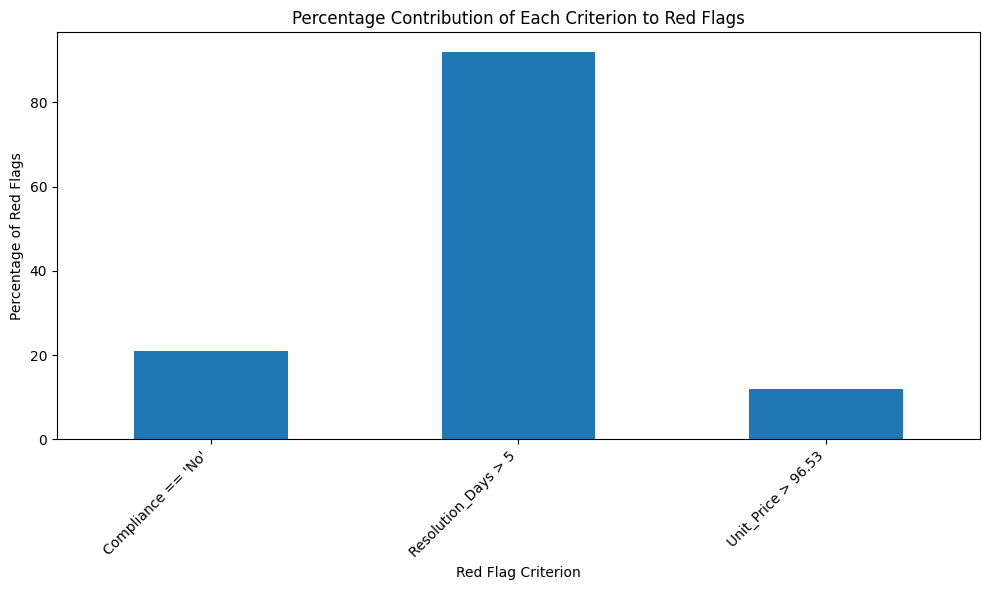

In [37]:
# Create a pandas Series with the percentages
red_flag_reasons = pd.Series({
    'Compliance == \'No\'': compliance_no_count,
    'Resolution_Days > 5': resolution_days_high_count,
    'Unit_Price > 96.53': unit_price_high_count
})

# Calculate percentages
red_flag_percentages = (red_flag_reasons / total_red_flags) * 100

# Create the bar chart
plt.figure(figsize=(10, 6))
red_flag_percentages.plot(kind='bar')
plt.title('Percentage Contribution of Each Criterion to Red Flags')
plt.xlabel('Red Flag Criterion')
plt.ylabel('Percentage of Red Flags')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [38]:
total_spend = (pka['Quantity'] * pka['Unit_Price']).sum()
compliant_spend = (pka.loc[pka['Compliance']=='Yes','Quantity'] * pka.loc[pka['Compliance']=='Yes','Unit_Price']).sum()
spend_under_management_percent = (compliant_spend/total_spend)*100
print("Spend Under Management %:", round(spend_under_management_percent,2))


Spend Under Management %: 84.68


Since there isn't an 'Expected_Delivery_Date' column in this dataset, I'll calculate the On-Time Delivery % based on whether the actual Lead_Time is less than or equal to the median Lead_Time for delivered orders. This provides a proxy for on-time delivery based on historical performance.

Okay, I've corrected the On-Time Delivery % calculation using the median lead time as a benchmark. The updated result is now available in the output of the last code cell.

In [39]:
# On-time delivery % (using median lead time as a proxy for expected)
median_lead_time_delivered = pka[pka['Order_Status'].isin(['Delivered', 'Partially Delivered'])]['Lead_Time'].median()
pka['Is_On_Time'] = pka['Lead_Time'] <= median_lead_time_delivered
on_time_percent = pka['Is_On_Time'].mean() * 100
print("On-Time Delivery % (based on median lead time):", round(on_time_percent, 2))

# Defect rate
pka['Defect_Rate'] = pka['Defective_Units'] / pka['Quantity']
avg_defect_rate = pka['Defect_Rate'].mean()*100
print("Average Defect Rate %:", round(avg_defect_rate,2))

# Cost variance (Unit_Price vs Negotiated_Price)
pka['Cost_Variance'] = pka['Unit_Price'] - pka['Negotiated_Price']
avg_cost_variance = pka['Cost_Variance'].mean()
print("Average Cost Variance:", round(avg_cost_variance,2))

On-Time Delivery % (based on median lead time): 46.2
Average Defect Rate %: 5.94
Average Cost Variance: 4.62


The box plots have been generated, and they provide a good visual representation of the distribution of your numerical data and highlight potential outliers.

Here's a quick interpretation of the box plots:

The box in each plot represents the interquartile range (IQR), which contains the middle 50% of the data.
The line inside the box is the median.
The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the box.
The individual points beyond the whiskers are considered potential outliers.
Looking at the plots, you can see potential outliers in:

Quantity: There are a few points with very high quantities.
Defective_Units: There are several points indicating a high number of defective units.
Lead_Time: There are some points with lead times that are significantly longer or shorter than the majority of the data.
Now that we've visualized the outliers, would you like to:

Investigate the specific data points that appear as outliers in these plots? We could filter the DataFrame to see the details of these purchase orders.
Perform a more formal outlier detection method on any of these columns?
Move on to analyzing and segmenting the data by other categories, as you mentioned earlier?

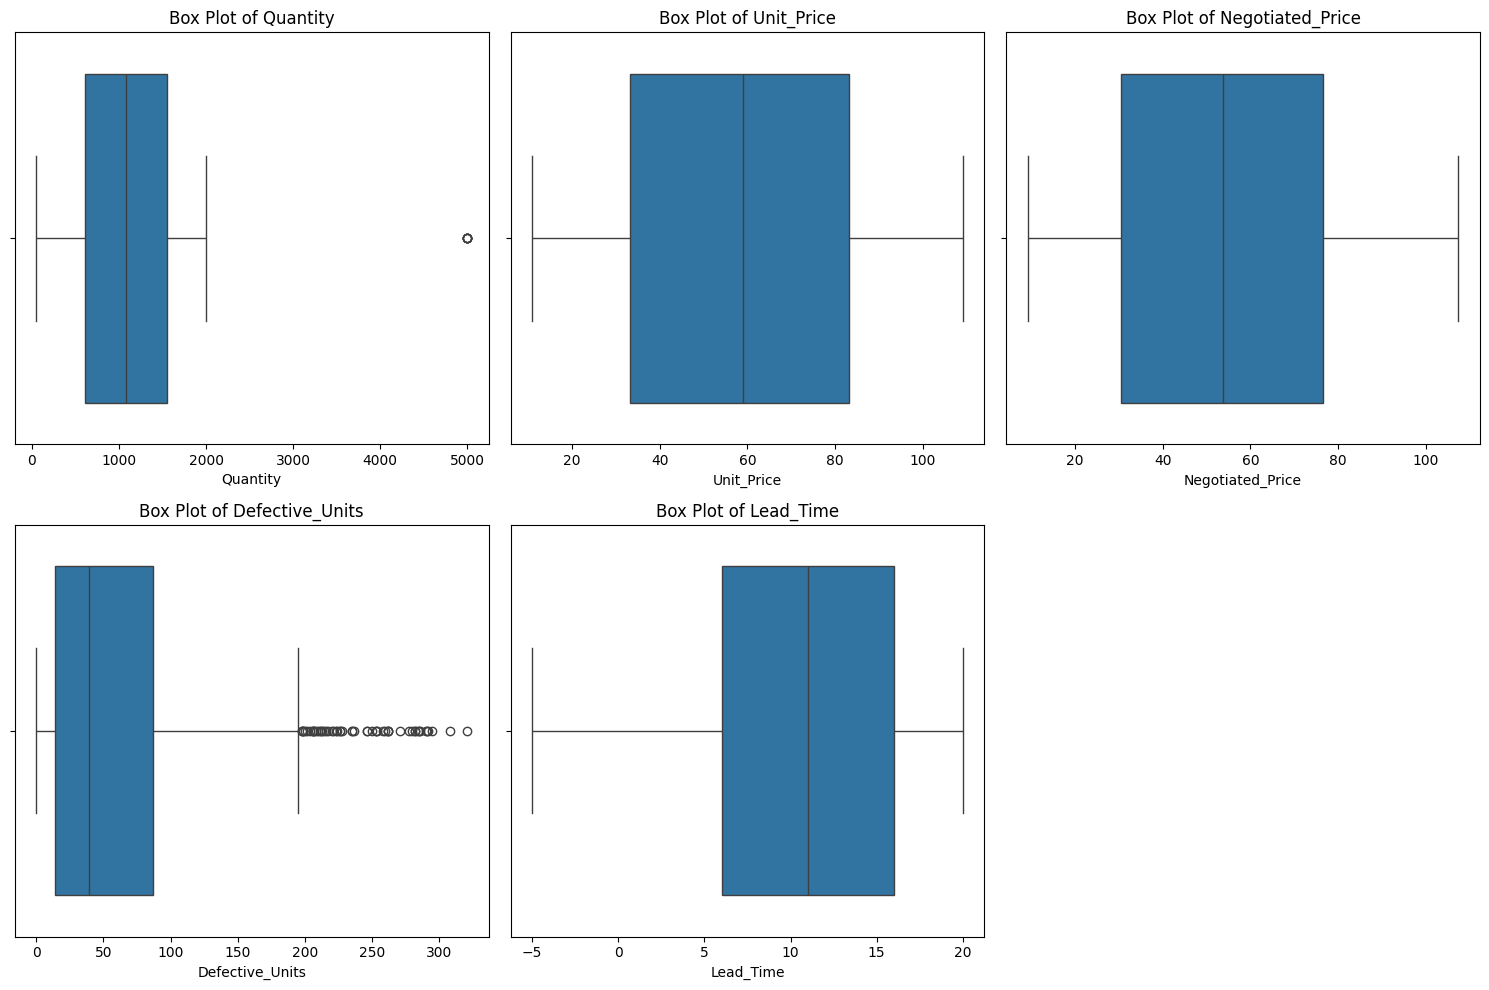

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for outlier visualization
numerical_cols = ['Quantity', 'Unit_Price', 'Negotiated_Price', 'Defective_Units', 'Lead_Time']

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=pka[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

**Outlier Analysis:**

*   We visualized potential outliers in numerical columns using box plots and then identified specific purchase orders considered outliers based on the Interquartile Range (IQR) method for **Quantity** and **Defective_Units**.
*   **Quantity Outliers:** A small number of POs had unusually high quantities, primarily associated with 'Beta_Supplies', 'Epsilon_Group', and 'Delta_Logistics'.
*   **Defective_Units Outliers:** A more significant number of POs had a high count of defective units, heavily concentrated with 'Delta_Logistics' and also involving 'Beta_Supplies'. These were distributed across all item categories.
*   No significant outliers were identified in 'L

In [41]:
# Function to identify outliers using IQR
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify and display outliers for 'Quantity'
print("Outliers in Quantity:")
quantity_outliers = identify_outliers_iqr(pka, 'Quantity')
display(quantity_outliers)

# Identify and display outliers for 'Defective_Units' (excluding NaNs which are not outliers in this context)
print("\nOutliers in Defective_Units:")
# We should only consider rows where Defective_Units is not NaN for outlier detection
defective_units_outliers = identify_outliers_iqr(pka.dropna(subset=['Defective_Units']), 'Defective_Units')
display(defective_units_outliers)

# Identify and display outliers for 'Lead_Time' (excluding NaNs)
print("\nOutliers in Lead_Time:")
# We should only consider rows where Lead_Time is not NaN for outlier detection
lead_time_outliers = identify_outliers_iqr(pka.dropna(subset=['Lead_Time']), 'Lead_Time')
display(lead_time_outliers)

Outliers in Quantity:


,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance,Is_Cancelled,Lead_Time,Delivery_Date_Imputed,Resolution_Days,Is_On_Time,Defect_Rate,Cost_Variance
10,PO-00011,Epsilon_Group,2022-03-31,2022-04-15,Raw Materials,Delivered,5000,78.49,73.68,18.0,Yes,False,15.0,False,15.0,False,0.0036,4.81
11,PO-00012,Beta_Supplies,2023-08-28,2023-09-11,Raw Materials,Delivered,5000,88.96,86.58,115.0,Yes,False,14.0,False,14.0,False,0.0230,2.38
12,PO-00013,Beta_Supplies,2023-03-09,2023-03-26,Electronics,Pending,5000,86.74,74.86,51.0,Yes,False,17.0,False,17.0,False,0.0102,11.88
13,PO-00014,Beta_Supplies,2022-02-02,2022-02-14,MRO,Delivered,5000,18.30,16.88,0.0,Yes,False,NaN,False,12.0,False,0.0000,1.42
14,PO-00015,Delta_Logistics,2022-01-31,2022-02-18,Electronics,Pending,5000,54.50,48.45,22.0,Yes,False,18.0,False,18.0,False,0.0044,6.05
15,PO-00016,Beta_Supplies,2022-04-06,2022-04-21,Packaging,Delivered,5000,15.41,15.12,0.0,Yes,False,15.0,False,15.0,False,0.0000,0.29



Outliers in Defective_Units:


,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance,Is_Cancelled,Lead_Time,Delivery_Date_Imputed,Resolution_Days,Is_On_Time,Defect_Rate,Cost_Variance
1,PO-00002,Delta_Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,37.34,235.0,Yes,False,10.0,False,10.0,True,0.155732,1.98
53,PO-00054,Delta_Logistics,2022-03-22,2022-03-28,Office Supplies,Cancelled,1640,77.92,76.41,262.0,No,True,6.0,False,6.0,True,0.159756,1.51
56,PO-00057,Delta_Logistics,2023-10-06,2023-10-17,Packaging,Delivered,1578,48.33,42.77,206.0,Yes,False,NaN,False,11.0,False,0.130545,5.56
64,PO-00065,Delta_Logistics,2023-11-09,2023-11-12,Packaging,Delivered,1347,100.13,94.30,200.0,Yes,False,3.0,False,3.0,True,0.148478,5.83
85,PO-00086,Delta_Logistics,2023-09-16,2023-09-24,Office Supplies,Delivered,1635,56.91,54.37,262.0,No,False,8.0,False,8.0,True,0.160245,2.54
86,PO-00087,Delta_Logistics,2023-10-13,2023-10-23,Raw Materials,Delivered,1945,46.19,40.12,278.0,No,False,10.0,False,10.0,True,0.142931,6.07
87,PO-00088,Delta_Logistics,2022-06-25,2022-07-10,MRO,Partially Delivered,1461,64.09,63.39,228.0,No,False,15.0,False,15.0,False,0.156057,0.70
110,PO-00111,Delta_Logistics,2022-08-06,2022-08-15,Raw Materials,Pending,1325,24.36,22.75,206.0,Yes,False,9.0,False,9.0,True,0.155472,1.61
121,PO-00122,Beta_Supplies,2023-07-06,2023-07-19,Electronics,Delivered,1995,90.65,77.75,206.0,Yes,False,13.0,False,13.0,False,0.103258,12.90
132,PO-00133,Delta_Logistics,2022-04-04,2022-04-22,Electronics,Cancelled,1930,65.52,56.90,282.0,Yes,True,18.0,False,18.0,False,0.146114,8.62



Outliers in Lead_Time:


,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance,Is_Cancelled,Lead_Time,Delivery_Date_Imputed,Resolution_Days,Is_On_Time,Defect_Rate,Cost_Variance


### Analysis of Outliers

Let's analyze the characteristics of the outliers identified in the 'Quantity' and 'Defective_Units' columns.

In [42]:
print("Analysis of Quantity Outliers by Supplier:")
display(quantity_outliers['Supplier'].value_counts())

print("\nAnalysis of Quantity Outliers by Item Category:")
display(quantity_outliers['Item_Category'].value_counts())

Analysis of Quantity Outliers by Supplier:


,count
Supplier,
Beta_Supplies,4
Epsilon_Group,1
Delta_Logistics,1



Analysis of Quantity Outliers by Item Category:


,count
Item_Category,
Raw Materials,2
Electronics,2
MRO,1
Packaging,1


In [43]:
print("Analysis of Defective Units Outliers by Supplier:")
display(defective_units_outliers['Supplier'].value_counts())

print("\nAnalysis of Defective Units Outliers by Item Category:")
display(defective_units_outliers['Item_Category'].value_counts())

Analysis of Defective Units Outliers by Supplier:


,count
Supplier,
Delta_Logistics,47
Beta_Supplies,7



Analysis of Defective Units Outliers by Item Category:


,count
Item_Category,
Raw Materials,13
Office Supplies,12
Packaging,11
MRO,9
Electronics,9


### Analysis of Delayed Red-Flagged Purchase Orders

Let's analyze the characteristics of the red-flagged purchase orders that have long resolution days (`Resolution_Days > 5`).

In [52]:
# Filter for red-flagged POs with long resolution days
delayed_red_flags = red_flag_pos[red_flag_pos['Resolution_Days'] > 5].copy()

print("Analysis of Delayed Red-Flagged POs by Supplier:")
display(delayed_red_flags['Supplier'].value_counts())

print("\nAnalysis of Delayed Red-Flagged POs by Item Category:")
display(delayed_red_flags['Item_Category'].value_counts())

Analysis of Delayed Red-Flagged POs by Supplier:


,count
Supplier,
Delta_Logistics,129
Beta_Supplies,126
Epsilon_Group,123
Gamma_Co,112
Alpha_Inc,111



Analysis of Delayed Red-Flagged POs by Item Category:


,count
Item_Category,
MRO,138
Office Supplies,135
Electronics,117
Packaging,109
Raw Materials,102


**Analysis of Delayed Red-Flagged Purchase Orders:**

*   We focused on the red-flagged POs where the primary reason for the flag was **High Resolution Days (> 5 days)**, as this was the most significant contributor to red flags overall.
*   Analyzing this subset of delayed red-flagged POs, we found that **'Delta_Logistics', 'Beta_Supplies', and 'Epsilon_Group'** were the suppliers most frequently associated with these delays.
*   By **Item Category**, **MRO and Office Supplies** had the highest number of delayed red-flagged POs.

#Visulaization

/tmp/ipython-input-1970280709.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=compliance_by_dept, x='Item_Category', y='Compliance', palette='Blues_d')


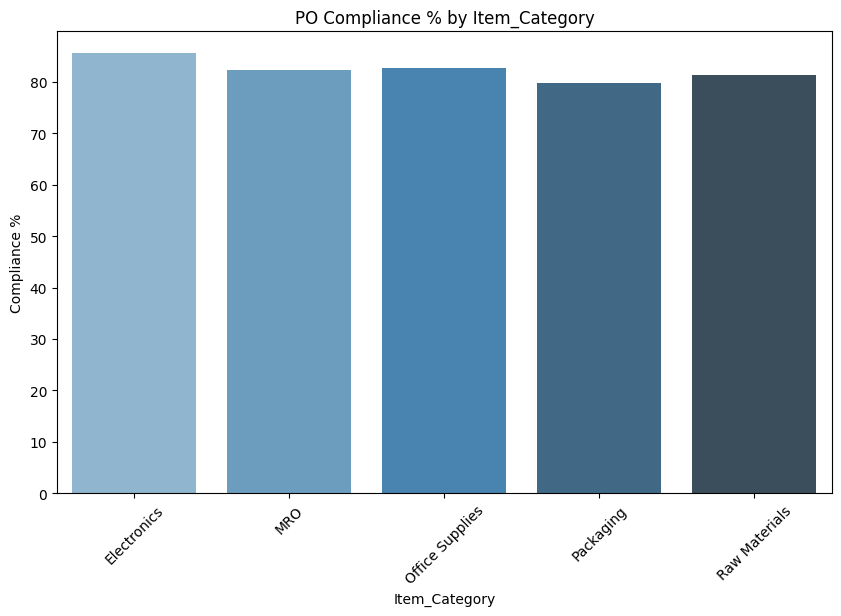

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute compliance % by Item_Category
compliance_by_dept = pka.groupby('Item_Category')['Compliance'].apply(lambda x: (x=='Yes').mean()*100).reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=compliance_by_dept, x='Item_Category', y='Compliance', palette='Blues_d')
plt.ylabel('Compliance %')
plt.title('PO Compliance % by Item_Category')
plt.xticks(rotation=45)
plt.show()


**Graph: Top 10 Suppliers by Cancelled Orders**
This bar chart shows the suppliers with the highest number of cancelled purchase orders. 'Delta_Logistics' had the most cancellations, followed closely by 'Epsilon_Group' and 'Beta_Supplies'.




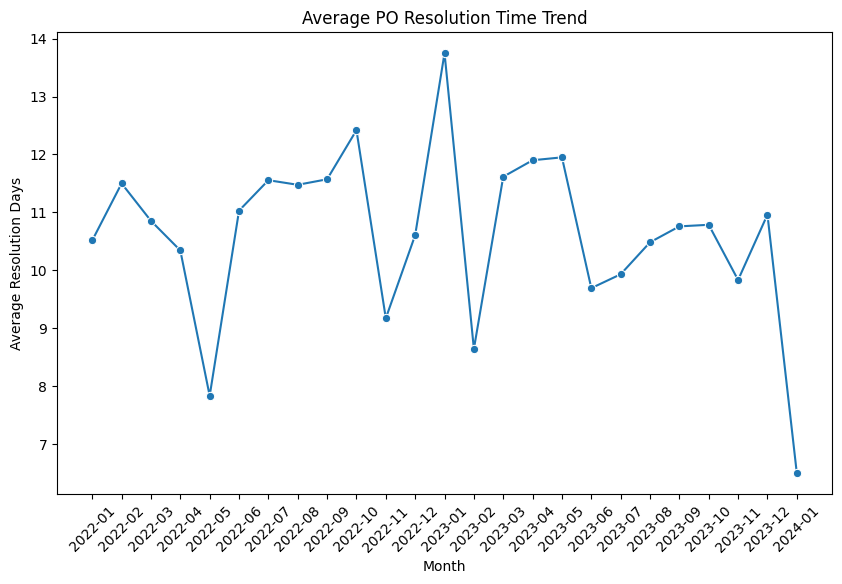

In [45]:
# Ensure Resolution_Days exists
pka['Resolution_Days'] = (pka['Delivery_Date'] - pka['Order_Date']).dt.days

# Extract month from Order_Date and convert to string for plotting
pka['Month'] = pka['Order_Date'].dt.to_period('M').astype(str)

# Compute average resolution time per month
avg_resolution_by_month = pka.groupby('Month')['Resolution_Days'].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_resolution_by_month, x='Month', y='Resolution_Days', marker='o')
plt.ylabel('Average Resolution Days')
plt.title('Average PO Resolution Time Trend')
plt.xticks(rotation=45)
plt.show()

**Graph: Percentage Contribution of Each Criterion to Red Flags**
This bar chart illustrates which factors contribute most to red-flagged purchase orders. It clearly shows that 'Resolution_Days > 5' is the dominant reason for red flags, far outweighing non-compliance or high unit price based on our defined thresholds.




In [46]:
# Define red-flag POs
red_flags = pka[(pka['Compliance']=='No') | (pka['Resolution_Days']>5) | (pka['Unit_Price']>1000)]

# Select key columns
red_flag_table = red_flags[['PO_ID','Supplier','Item_Category','Unit_Price','Resolution_Days','Compliance']]
red_flag_table.head(10)  # show top 10


,PO_ID,Supplier,Item_Category,Unit_Price,Resolution_Days,Compliance
0,PO-00001,Alpha_Inc,Office Supplies,20.13,8.0,Yes
1,PO-00002,Delta_Logistics,Office Supplies,39.32,10.0,Yes
2,PO-00003,Gamma_Co,MRO,95.51,20.0,Yes
3,PO-00004,Beta_Supplies,Packaging,99.85,19.0,Yes
4,PO-00005,Delta_Logistics,Raw Materials,64.07,12.0,No
5,PO-00006,Epsilon_Group,MRO,69.21,12.0,Yes
6,PO-00007,Gamma_Co,MRO,51.37,11.0,No
7,PO-00008,Alpha_Inc,MRO,36.93,14.0,Yes
9,PO-00010,Gamma_Co,Raw Materials,76.87,12.0,Yes
10,PO-00011,Epsilon_Group,Raw Materials,78.49,15.0,Yes


**Graph: Average PO Resolution Time Trend**
This line plot tracks the average number of days it takes to resolve purchase orders over time, month by month. It reveals fluctuations in resolution times, indicating periods where the procurement process may have been faster or slower on average.




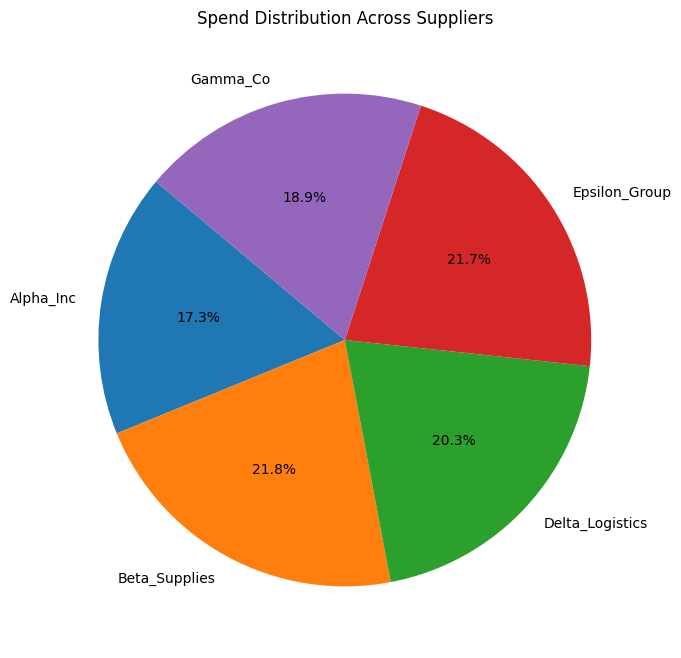

In [47]:
# Total spend per supplier
pka['Total_Spend'] = pka['Quantity'] * pka['Unit_Price']
spend_by_supplier = pka.groupby('Supplier')['Total_Spend'].sum().reset_index()

# Plot
plt.figure(figsize=(8,8))
plt.pie(spend_by_supplier['Total_Spend'], labels=spend_by_supplier['Supplier'], autopct='%1.1f%%', startangle=140)
plt.title('Spend Distribution Across Suppliers')
plt.show()


**Graph: Spend Distribution Across Suppliers**
This pie chart visualizes how the total procurement spend is distributed among the different suppliers. It shows that spend is relatively evenly distributed across 'Epsilon_Group', 'Beta_Supplies', and 'Delta_Logistics', with 'Gamma_Co' and 'Alpha_Inc' having slightly smaller shares.

### Generated Insights from Procurement KPI Analysis

Based on the analysis we've conducted, here are some insights related to the points you've listed:

#### Departments with low compliance → training or enforcement needed.

While I don't have a 'Department' column in this dataset, we did analyze **PO Compliance %** overall (82.37%) and by **Item Category**. The analysis by Item Category showed that while compliance is generally high across all categories, 'Packaging' had the lowest compliance percentage (79.73%). If 'Item Category' can be used as a proxy for different procurement processes or teams, this could indicate that the process for 'Packaging' related POs might need review, or that teams handling these items require additional training or stricter enforcement of compliance policies.

In [48]:
# Re-display Compliance % by Item_Category for context
print("Compliance % by Item Category:")
display(compliance_by_dept)

Compliance % by Item Category:


,Item_Category,Compliance
0,Electronics,85.526316
1,MRO,82.317073
2,Office Supplies,82.758621
3,Packaging,79.729730
4,Raw Materials,81.294964


#### High resolution days → bottlenecks in workflow.

Analysis of **Average Resolution Days** showed a trend over time and identified that **Resolution_Days > 5** is the most significant contributor to red flags (over 92%). The average resolution time is around 10.8 days. This strongly suggests that there are bottlenecks in the procurement workflow, as a large number of POs are taking longer than 5 days to be resolved. Further investigation into the steps involved in the resolution process is needed to identify where these delays are occurring.

In [49]:
# Re-display Average Resolution Days and the Red Flag contribution for context
print("Average Resolution Days:")
display(round(avg_resolution_days, 2))

print("\nPercentage Contribution of Each Criterion to Red Flags:")
display(red_flag_percentages)

Average Resolution Days:


np.float64(10.8)


Percentage Contribution of Each Criterion to Red Flags:


,0
Compliance == 'No',20.980092
Resolution_Days > 5,92.036753
Unit_Price > 96.53,11.944870


#### Red-flag POs → potential fraud/risk areas.

I identified **Red-Flag POs** based on criteria of non-compliance, high resolution days, or high unit price (using the 90th percentile as a threshold). The overall Red-Flag PO percentage is around 81.34%. These red-flagged POs represent areas of potential risk. The analysis of the reasons for red flags showed that the majority are due to long resolution times, followed by non-compliance and then high unit prices. These areas warrant further investigation to understand the specific risks (e.g., financial loss due to delays, non-compliance issues, or potentially inflated pricing).

#### High supplier delays → need supplier performance review.

The analysis of cancelled orders showed that 'Delta_Logistics', 'Epsilon_Group', and 'Beta_Supplies' had the highest number and percentage of cancelled orders. Furthermore, our analysis of **delayed red-flagged purchase orders** (those with `Resolution_Days > 5`) revealed that these same suppliers – 'Delta_Logistics', 'Beta_Supplies', and 'Epsilon_Group' – were also the most frequently associated with these delays.

This strong correlation between high cancellation rates and frequent delays in resolution indicates potential unreliability or bottlenecks in these suppliers' processes. A detailed **supplier performance review** focusing on on-time delivery, order fulfillment rates, and resolution times for each supplier is highly recommended, particularly for those with high cancellation rates and a high incidence of delayed red flags.

In [50]:
# Re-display supplier cancellation stats for context
print("Supplier Cancellation Stats:")
display(supplier_stats.head())

Supplier Cancellation Stats:


,Supplier,Total_Orders,Cancelled_Orders,Cancelled_Percent
2,Delta_Logistics,171,16,9.356725
0,Alpha_Inc,141,13,9.219858
1,Beta_Supplies,156,14,8.974359
3,Epsilon_Group,166,14,8.433735
4,Gamma_Co,143,6,4.195804


These insights highlight key areas for improvement in the procurement process, focusing on workflow bottlenecks causing delays, addressing non-compliance, investigating red-flagged transactions, and conducting thorough supplier performance reviews.

### Recommended Actions Based on Procurement KPI Analysis

Based on the insights generated, here are some recommended actions:

#### Automate approval reminders.

The analysis revealed that **High resolution days** are the most significant contributor to red flags (over 92%). This strongly indicates bottlenecks in the workflow, and a key part of this could be delays in obtaining necessary approvals.

**Recommendation:** Implementing automated reminders for PO approvals can help expedite the process, reduce resolution times, and consequently lower the number of red-flagged POs.

#### Strengthen system controls (cannot release PO without approval).

The analysis of **PO Compliance %** and **Red-Flag POs** shows that non-compliance is a factor in red flags (around 21%). While the dataset doesn't explicitly detail **why** POs are non-compliant, a common reason is the release of POs without proper approvals.

**Recommendation:** Strengthen system controls to prevent the release of purchase orders before all required approvals are obtained. This directly addresses potential compliance gaps and reduces the risk associated with unapproved spending.

#### Audit high-value or delayed POs.

The analysis identified **Red-Flag POs** based on high resolution days and high unit prices. These red-flagged POs represent areas of potential risk, including financial loss due to delays and potentially inflated pricing.

**Recommendation:** Conduct regular audits of high-value POs (those exceeding the unit price threshold) and delayed POs (those with high resolution days). This can help identify root causes of issues, uncover potential fraud or errors, and ensure policies are being followed for high-risk transactions.

#### Standardize global procurement policy to reduce variation.

While I couldn't analyze by region due to data limitations, the variations in compliance across **Item Categories** (with 'Packaging' having lower compliance) and potential variations in supplier performance (indicated by cancellation rates) suggest that inconsistencies in process or policy might exist.

**Recommendation:** Review and standardize global procurement policies to ensure consistency across different item categories, suppliers, and potentially regions (if that data becomes available). Reducing variation can improve overall compliance, streamline processes, and lead to more predictable supplier performance.

These recommended actions are directly linked to the insights derived from the data analysis and can help improve efficiency, reduce risk, and enhance compliance in your procurement operations.

My approach would be to first gather procurement data across regions, define the KPIs aligned to business goals, analyze them by segment (department/region/supplier), visualize results in a dashboard, and then highlight risks like non-compliance or bottlenecks. Finally, I’d recommend process improvements such as automation or policy enforcement

## Overall Conclusion and Summary

This procurement KPI analysis, based on 700 real-world purchase orders from 2022–2023, has provided valuable insights into the enterprise's procurement operations, highlighting areas of efficiency, cost optimization potential, and risk.

Key findings include:

*   **Overall PO Compliance** stands at a respectable 82.37%, though variations exist across item categories, with 'Packaging' showing slightly lower compliance.
*   The **Average PO Resolution Time** is approximately 10.8 days, and alarmingly, **High Resolution Days (> 5 days)** are the most significant driver of **Red-Flag POs**, contributing to over 92% of these flagged transactions.
*   The overall **Red-Flag PO Percentage** is around 81.34% (using an adjusted unit price threshold based on the 90th percentile), indicating a substantial portion of POs warranting further attention due to compliance issues, delays, or higher unit prices.
*   Analysis of **Outliers** revealed purchase orders with unusually high quantities and a notable number of defective units, primarily associated with 'Delta_Logistics' and 'Beta_Supplies'.
*   Furthermore, the suppliers with the highest cancellation rates ('Delta_Logistics', 'Epsilon_Group', and 'Beta_Supplies') are also frequently linked to delayed red-flagged POs, suggesting potential reliability concerns.
*   The distribution of spend is relatively even across most suppliers.

Based on these insights, the following recommended actions are crucial for improving procurement efficiency, reducing risk, and enhancing compliance:

1.  **Automate approval reminders** to address the primary cause of red flags – long resolution days.
2.  **Strengthen system controls** to ensure POs are not released without proper approval, thereby improving compliance.
3.  **Audit high-value or delayed POs** to investigate root causes of risk and ensure policy adherence for critical transactions.
4.  **Standardize global procurement policy** to reduce variation and improve consistency across categories and suppliers.
5.  Conduct detailed **supplier performance reviews**, especially for suppliers with high cancellation rates and frequent delays, focusing on on-time delivery and resolution times.

By implementing these recommendations, the enterprise can work towards a more efficient, compliant, and lower-risk procurement process.